# Proyek Data Mining - Projek Akhir

- Nama    : Isna Nur Amalia
- NIM     : A11.2022.14330
- Kelas   : A11.43UG1
- GitHub  : https://github.com/isnanramalia/klasifikasi-siswa-dropout/tree/main


### Tujuan
- Menemukan faktor-faktor yang mempengaruhi siswa untuk dikeluarkan atau dimutasi
- Memberikan treatment atau pencegahan agar hal yang sama tidak terjadi lagi
- Meningkatkan kualitas lulusan SMK Askhabul Kahfi


## Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [4]:
# load dataset
data = pd.read_csv("data_smk_askha_clean.csv")
data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,L,2003-01-28,SEMARANG,Cilacap Tengah,Bersama orang tua,Sepeda,SMP / sederajat,Wiraswasta,"Rp. 5,000,000 - Rp. 20,000,000",D3,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
1,L,2004-11-14,SEMARANG,Mijen,Bersama orang tua,Jalan kaki,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
2,L,2006-05-26,Semarang,Ngaliyan,Bersama orang tua,Ojek,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMP / sederajat,Tidak bekerja,Tidak Berpenghasilan,Mutasi
3,L,1998-07-08,TEGAL,Balapulang,Panti asuhan,Sepeda motor,SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
4,L,1995-12-18,SEMARANG,Semarang,Asrama,Jalan kaki,SD / sederajat,Petani,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Petani,"Rp. 1,000,000 - Rp. 1,999,999",Lulus


### Assessing Data

#### Menilai tabel `data_smk_askha`

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   JK                      1031 non-null   object
 1   Tanggal Lahir           1031 non-null   object
 2   Tempat Lahir            1031 non-null   object
 3   Asal Kecamatan          1031 non-null   object
 4   Jenis Tinggal           1031 non-null   object
 5   Alat Transportasi       1031 non-null   object
 6   Jenjang Pendidikan Ayh  1031 non-null   object
 7   Pekerjaan Ayh           1031 non-null   object
 8   Penghasilan Ayh         1031 non-null   object
 9   Jenjang Pendidikan Ibu  1031 non-null   object
 10  Pekerjaan Ibu           1031 non-null   object
 11  Penghasilan Ibu         1031 non-null   object
 12  Keluar Karena           1031 non-null   object
dtypes: object(13)
memory usage: 104.8+ KB


In [6]:
data.isna().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
data.describe() # utk melihat statistik deskriptif

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
unique,2,889,109,262,7,7,12,16,7,12,14,6,5
top,L,2003-01-28,SEMARANG,Singorojo,Asrama,Jalan kaki,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Tidak bekerja,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
freq,637,4,331,124,587,868,396,335,698,403,334,592,819


#### Cleaning Data `data_smk_askha`

##### Duplicate data

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [12]:
data.isna().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

In [13]:
data[data['Jenis Tinggal'].isna()]

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena


In [14]:
data['Jenis Tinggal'].value_counts()

Jenis Tinggal
Asrama               587
Bersama orang tua    280
Pesantren            120
Rumah Tinggal         36
Lainnya                5
Wali                   2
Panti asuhan           1
Name: count, dtype: int64

In [15]:
data.fillna(value={'Jenis Tinggal': 'Rumah Tinggal'}, inplace=True)

In [16]:
data.isna().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

In [17]:
# mengisi missing value dgn modulus
data["Alat Transportasi"].fillna(data["Alat Transportasi"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ayh"].fillna(data["Jenjang Pendidikan Ayh"].mode().iloc[0], inplace=True)
data["Penghasilan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Pekerjaan Ayh"].fillna(data["Penghasilan Ayh"].mode().iloc[0], inplace=True)
data["Jenjang Pendidikan Ibu"].fillna(data["Jenjang Pendidikan Ibu"].mode().iloc[0], inplace=True)
data["Pekerjaan Ibu"].fillna(data["Pekerjaan Ibu"].mode().iloc[0], inplace=True)
data["Penghasilan Ibu"].fillna(data["Penghasilan Ibu"].mode().iloc[0], inplace=True)

# setelah di preprocessing
data.isnull().sum()

JK                        0
Tanggal Lahir             0
Tempat Lahir              0
Asal Kecamatan            0
Jenis Tinggal             0
Alat Transportasi         0
Jenjang Pendidikan Ayh    0
Pekerjaan Ayh             0
Penghasilan Ayh           0
Jenjang Pendidikan Ibu    0
Pekerjaan Ibu             0
Penghasilan Ibu           0
Keluar Karena             0
dtype: int64

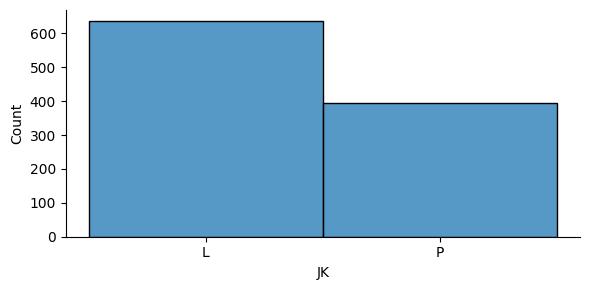

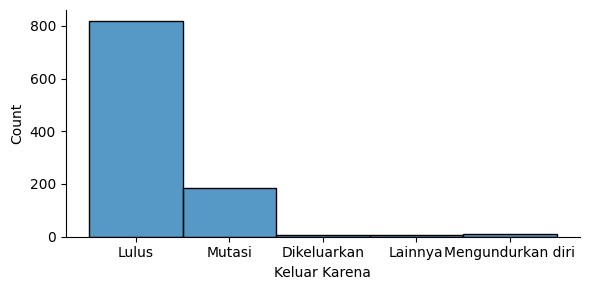

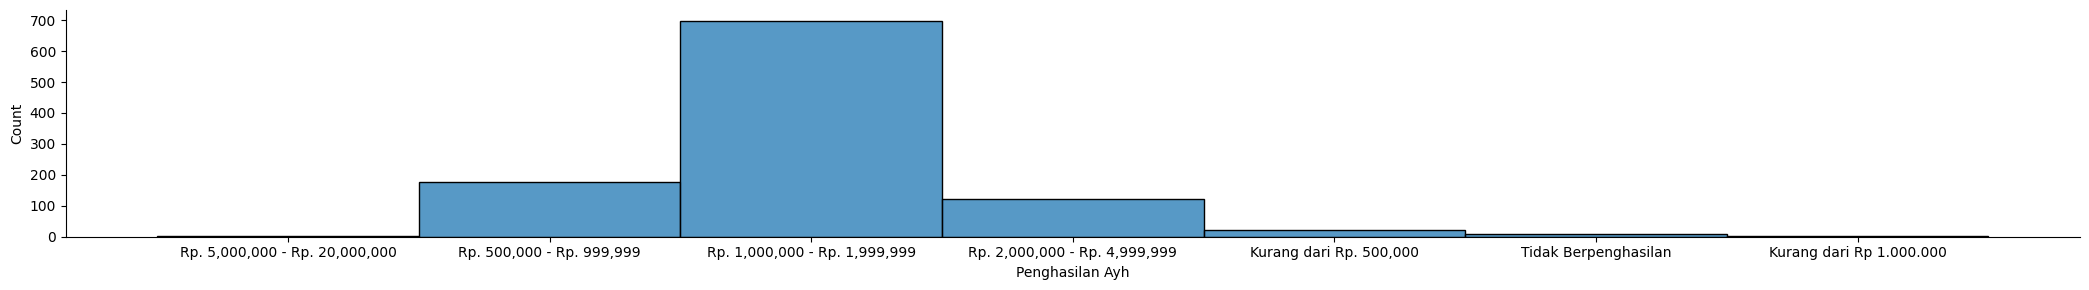

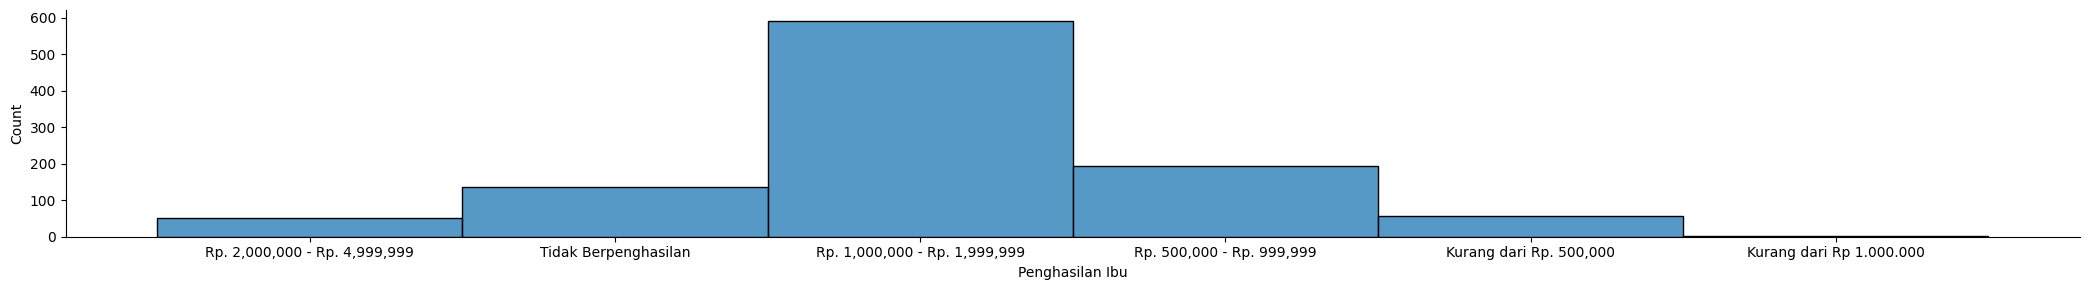

In [18]:
# visualisasi data
ax = sns.displot(data, x = "JK", height=3, aspect=2)
ax = sns.displot(data, x = "Keluar Karena", height=3, aspect=2)
ax = sns.displot(data, x = "Penghasilan Ayh", height=3, aspect=7)
ax = sns.displot(data, x = "Penghasilan Ibu", height=3, aspect=7)

In [19]:
data.describe()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
unique,2,889,109,262,7,7,12,16,7,12,14,6,5
top,L,2003-01-28,SEMARANG,Singorojo,Asrama,Jalan kaki,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Tidak bekerja,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
freq,637,4,331,124,587,868,396,335,698,403,334,592,819


##### Konversi data setelah di preprocessing

In [20]:
# save data
data.to_csv("data_smk_askha_clean.csv", index=False)

##### Konversi ke numerik

In [21]:
# Factorize columns and save the labels
data["JK"], labels_JK = pd.factorize(data.JK)
data["Tempat Lahir"], labels_TempatLahir = pd.factorize(data["Tempat Lahir"])
data["Asal Kecamatan"], labels_AsalKecamatan = pd.factorize(data["Asal Kecamatan"])
data["Jenis Tinggal"], labels_JenisTinggal = pd.factorize(data["Jenis Tinggal"])
data["Alat Transportasi"], labels_AlatTransportasi = pd.factorize(data["Alat Transportasi"])
data["Jenjang Pendidikan Ayh"], labels_JenjangPendidikanAyh = pd.factorize(data["Jenjang Pendidikan Ayh"])
data["Pekerjaan Ayh"], labels_PekerjaanAyh = pd.factorize(data["Pekerjaan Ayh"])
data["Penghasilan Ayh"], labels_PenghasilanAyh = pd.factorize(data["Penghasilan Ayh"])
data["Jenjang Pendidikan Ibu"], labels_JenjangPendidikanIbu = pd.factorize(data["Jenjang Pendidikan Ibu"])
data["Pekerjaan Ibu"], labels_PekerjaanIbu = pd.factorize(data["Pekerjaan Ibu"])
data["Penghasilan Ibu"], labels_PenghasilanIbu = pd.factorize(data["Penghasilan Ibu"])
data["Keluar Karena"], labels_KeluarKarena = pd.factorize(data["Keluar Karena"])

# Save data
data.to_csv("data_numerik_2.csv")

## Exploratory Data Analysis (EDA)

### Explore `data_smk_askha`

In [22]:
data.sample(5)

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
218,0,2002-12-20,1,59,0,1,1,1,2,4,1,1,1
997,0,1998-06-04,101,257,2,1,0,0,2,1,1,1,0
621,0,2001-03-22,4,7,2,1,4,5,2,5,0,2,0
967,0,2004-07-31,0,248,2,1,4,0,2,1,2,2,0
569,0,2000-11-20,1,5,0,4,0,2,1,1,4,3,0


In [23]:
data.describe(include='all')

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
count,1031.000000,1031,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
unique,NaN,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2003-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.382153,NaN,9.840931,51.758487,1.745878,1.329777,1.635306,2.582929,2.016489,2.458778,2.059166,2.069835,0.258002
std,0.486150,NaN,21.379191,66.389194,1.264688,0.920044,1.492009,3.022675,0.687418,1.558565,1.999367,0.860668,0.608493
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,0.000000,7.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,0.000000,NaN,4.000000,22.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,NaN,4.000000,76.500000,2.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,0.000000


In [24]:
# splitting the data
from sklearn.model_selection import train_test_split

# define input and target variable
x = data[["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]]
y = data["Keluar Karena"]

# splitting test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn import tree

# define classification algorithm
dt_clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt_clf = dt_clf.fit(x_train, y_train)

# generating prediction
y_pred = dt_clf.predict(x_test)

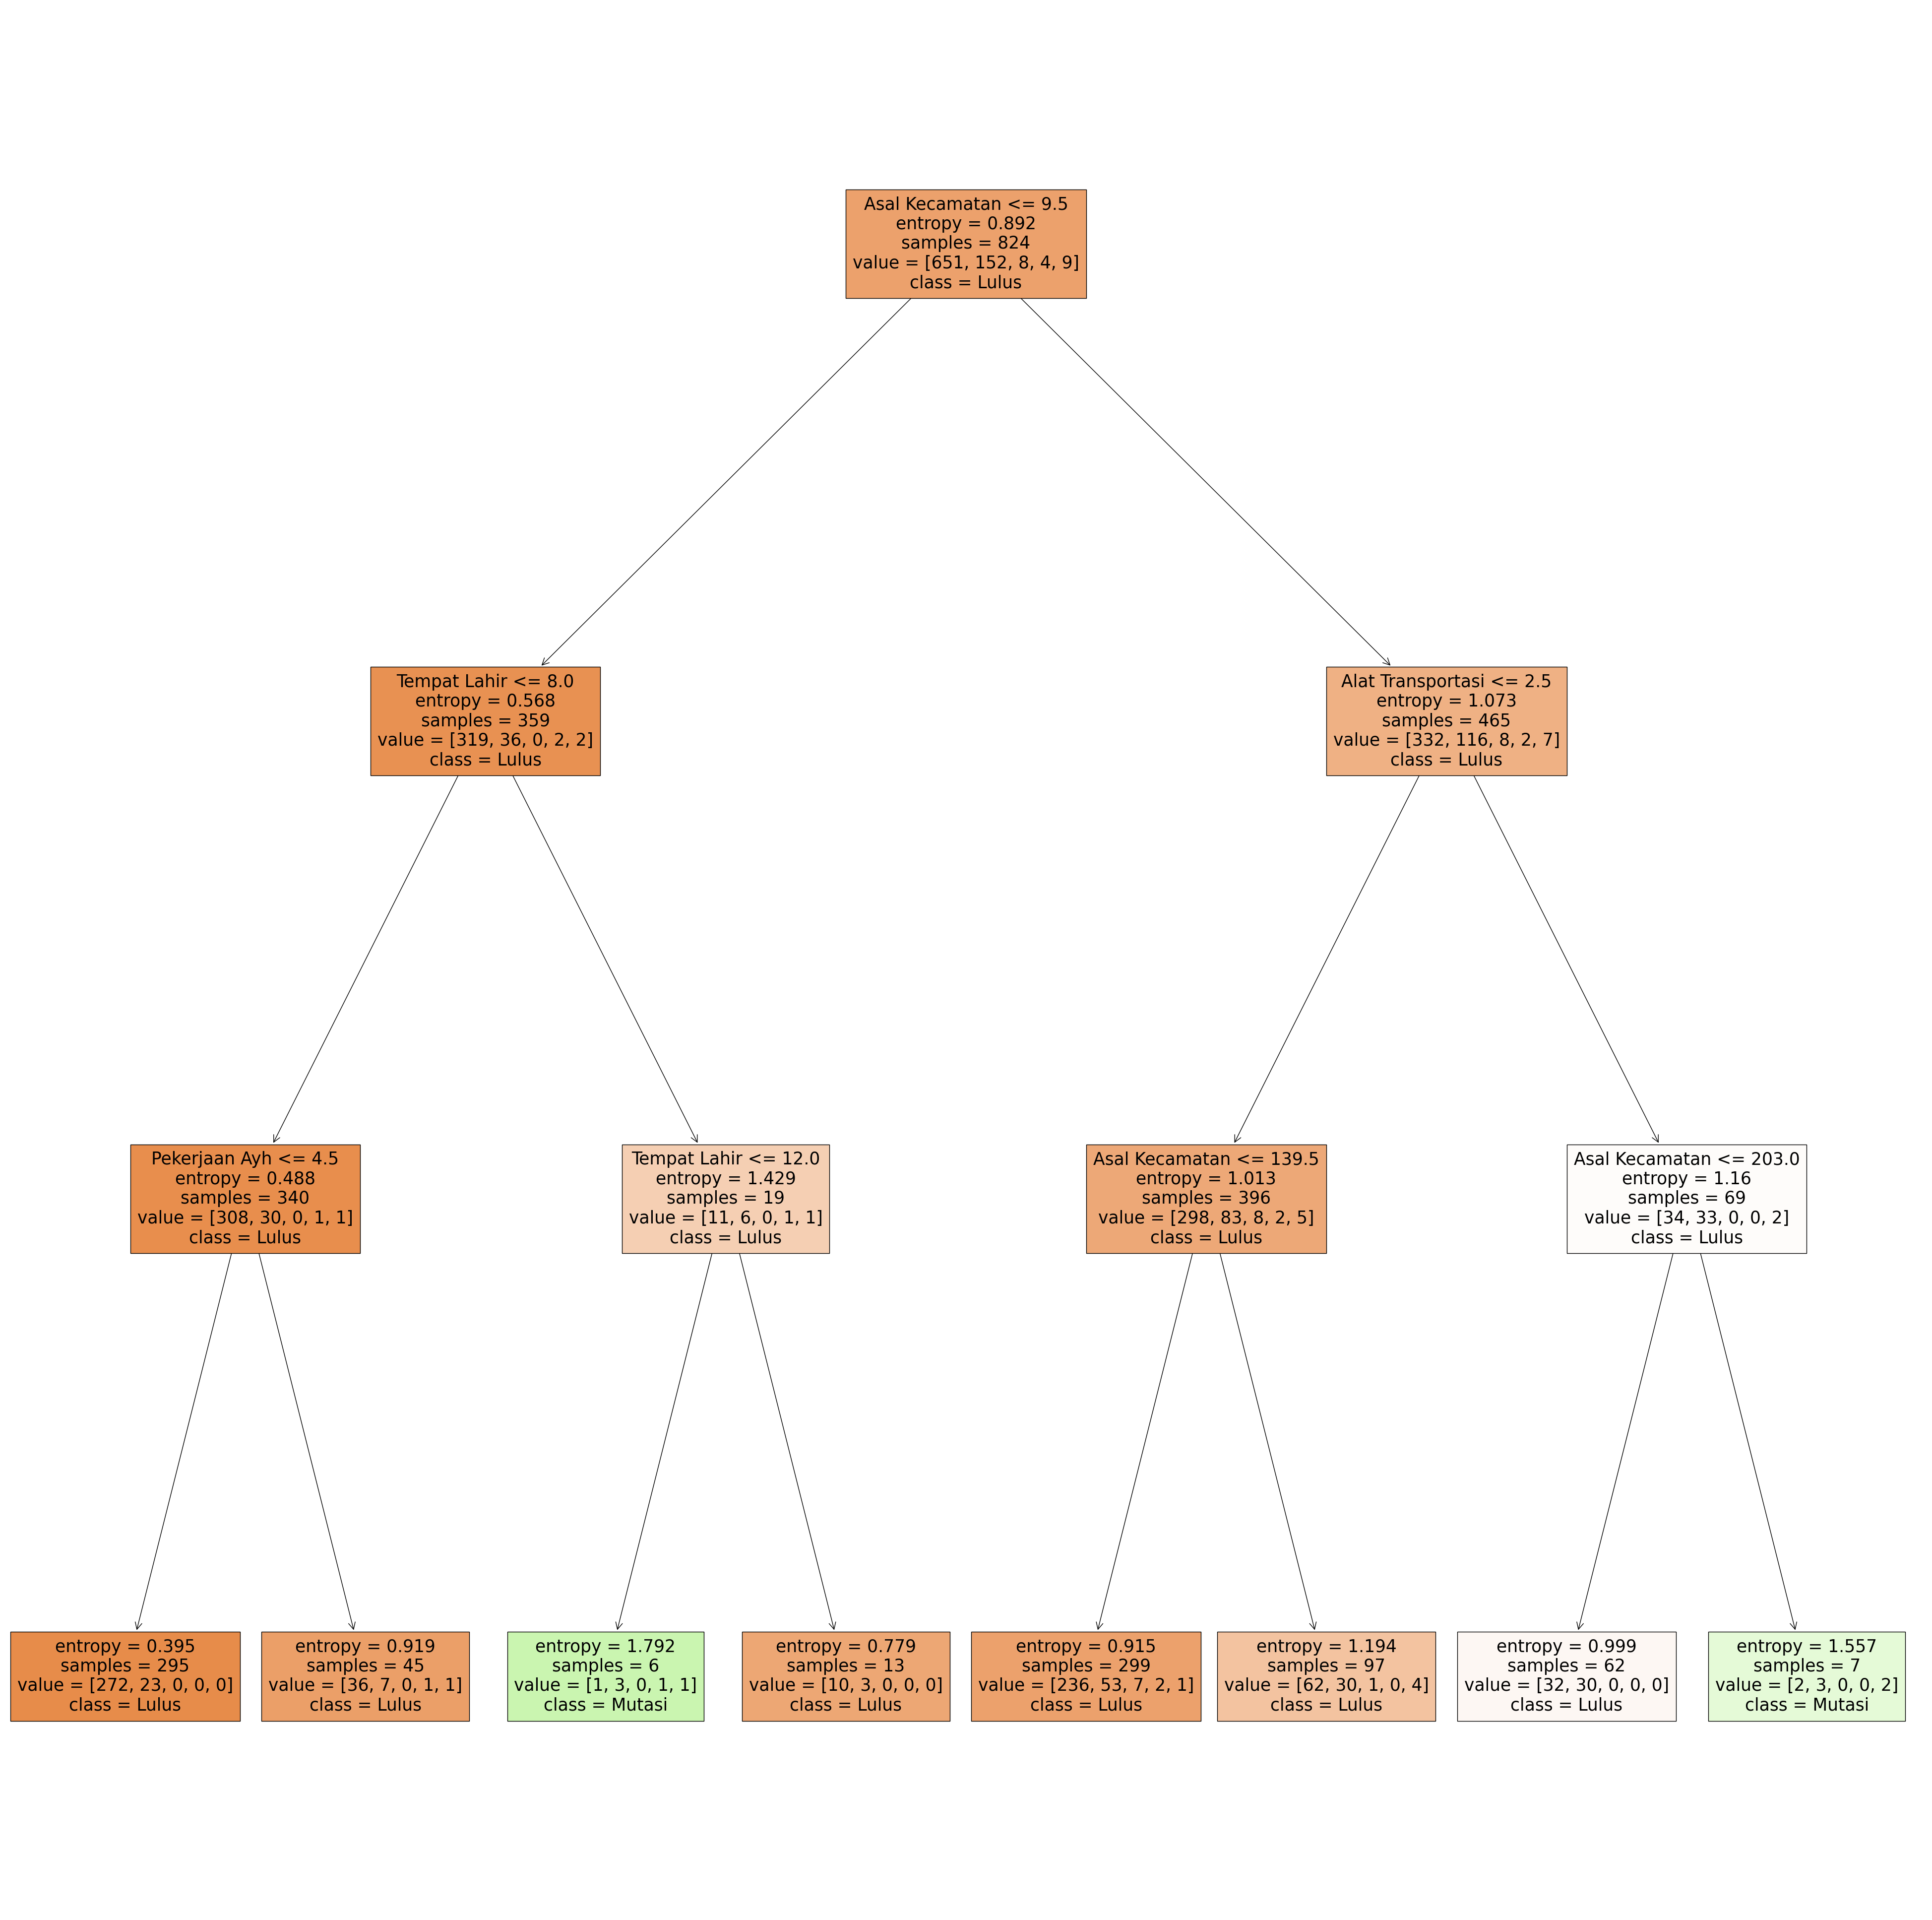

In [26]:
# plotting the decision tree
feature_names = ["JK", "Tempat Lahir", "Asal Kecamatan", "Jenis Tinggal", "Alat Transportasi", "Jenjang Pendidikan Ayh", "Pekerjaan Ayh", "Penghasilan Ayh", "Pekerjaan Ibu", "Penghasilan Ibu"]
class_names = ["Lulus", "Mutasi", "Dikeluarkan", "Mengundurkan Diri", "Lainnya"]

fig = plt.figure(figsize=(50,50))
plot = tree.plot_tree(dt_clf,
                      feature_names = feature_names,
                      class_names = class_names,
                      filled = True)
plt.show()

In [27]:
y_test.shape

(207,)

In [28]:
from sklearn.metrics import f1_score

# Misalkan y_test adalah label yang benar dan y_pred adalah hasil prediksi
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# f1_micro akan berisi skor F1 agregat
print(f1_weighted)

0.7271884057971014


In [29]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8115942028985508

In [30]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='weighted')

0.658685150178534

In [31]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='weighted')

0.8115942028985508

## Visualization

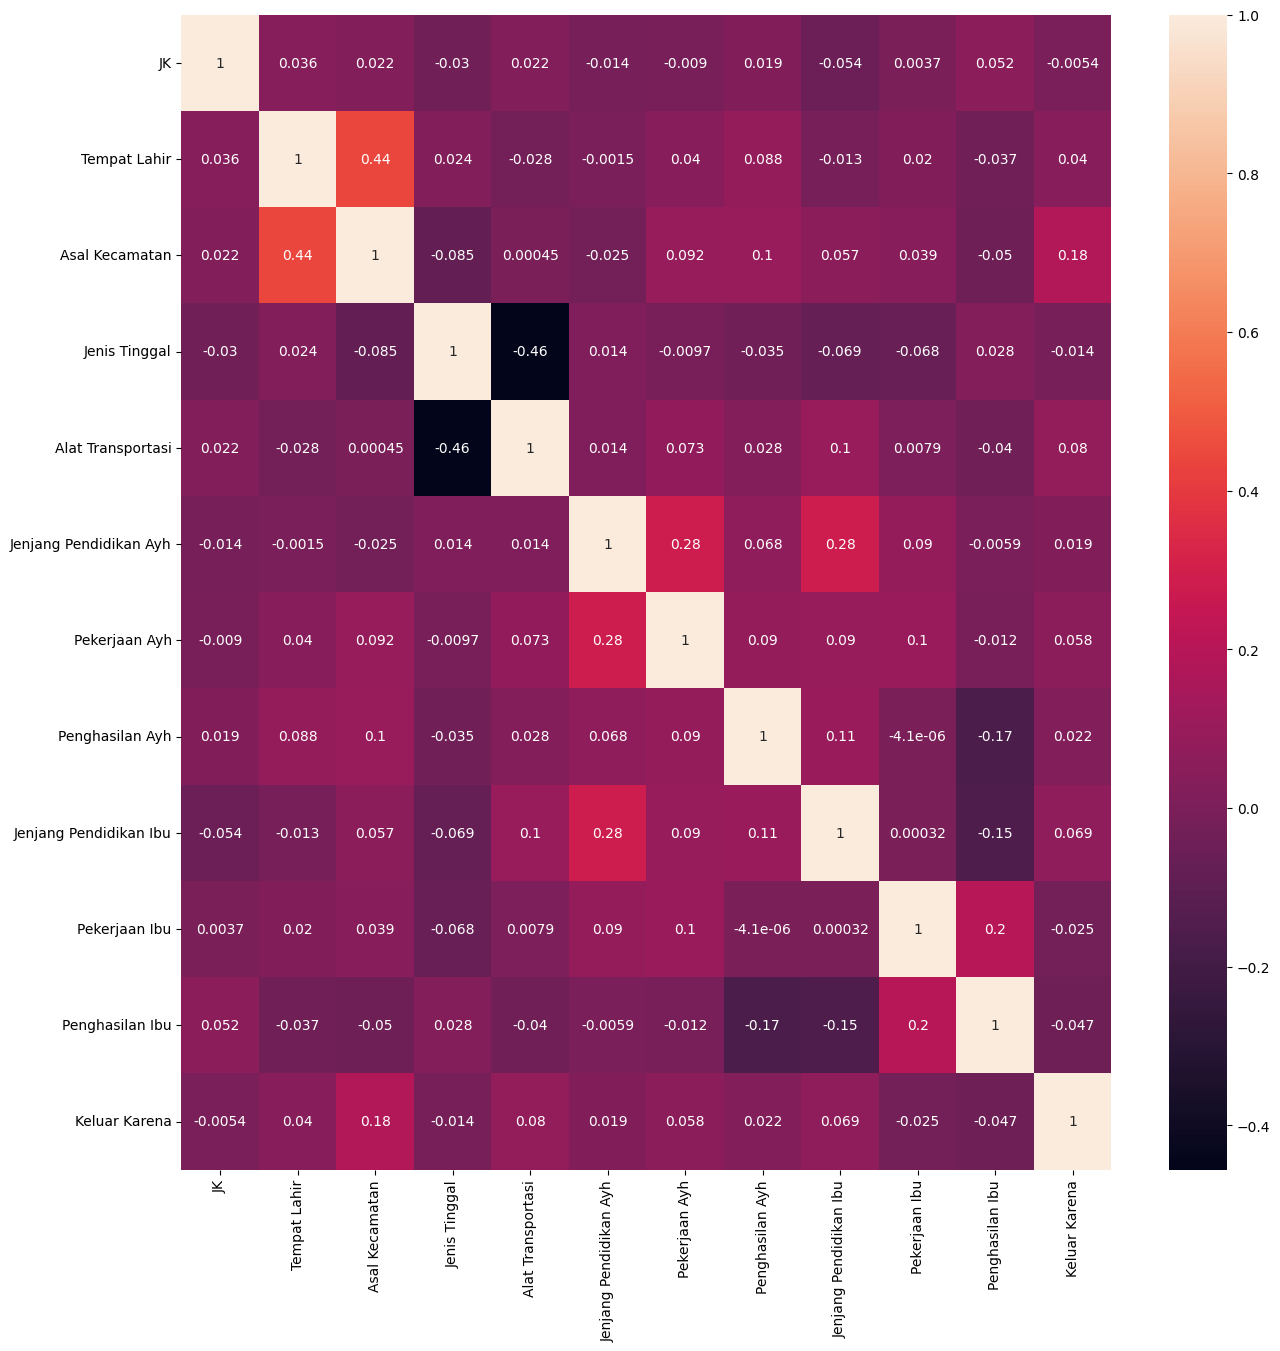

In [32]:
plt.figure(figsize=(15, 15))
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [33]:
# kesimpulan dari diagram diatas adalah: data tidak ada yang berkorelasi kuat, namun ada beberapa yang berkorelasi sedang seperti: JK dan Keluar Karena, JK dan Penghasilan Ayh, JK dan Penghasilan Ibu, JK dan Pekerjaan Ibu, JK dan Jenjang Pendidikan Ibu, JK dan Pekerjaan Ayh, JK dan Jenjang Pendidikan Ayh, JK dan Alat Transportasi, JK dan Jenis Tinggal, JK dan Asal Kecamatan, JK dan Tempat Lahir
# maka dari itu, saya memilih variabel JK untuk dijadikan variabel prediktor dan Keluar Karena sebagai variabel target

In [34]:


# To convert back to original form after training
data["JK"] = labels_JK[data["JK"]]
data["Tempat Lahir"] = labels_TempatLahir[data["Tempat Lahir"]]
data["Asal Kecamatan"] = labels_AsalKecamatan[data["Asal Kecamatan"]]
data["Jenis Tinggal"] = labels_JenisTinggal[data["Jenis Tinggal"]]
data["Alat Transportasi"] = labels_AlatTransportasi[data["Alat Transportasi"]]
data["Jenjang Pendidikan Ayh"] = labels_JenjangPendidikanAyh[data["Jenjang Pendidikan Ayh"]]
data["Pekerjaan Ayh"] = labels_PekerjaanAyh[data["Pekerjaan Ayh"]]
data["Penghasilan Ayh"] = labels_PenghasilanAyh[data["Penghasilan Ayh"]]
data["Jenjang Pendidikan Ibu"] = labels_JenjangPendidikanIbu[data["Jenjang Pendidikan Ibu"]]
data["Pekerjaan Ibu"] = labels_PekerjaanIbu[data["Pekerjaan Ibu"]]
data["Penghasilan Ibu"] = labels_PenghasilanIbu[data["Penghasilan Ibu"]]
data["Keluar Karena"] = labels_KeluarKarena[data["Keluar Karena"]]

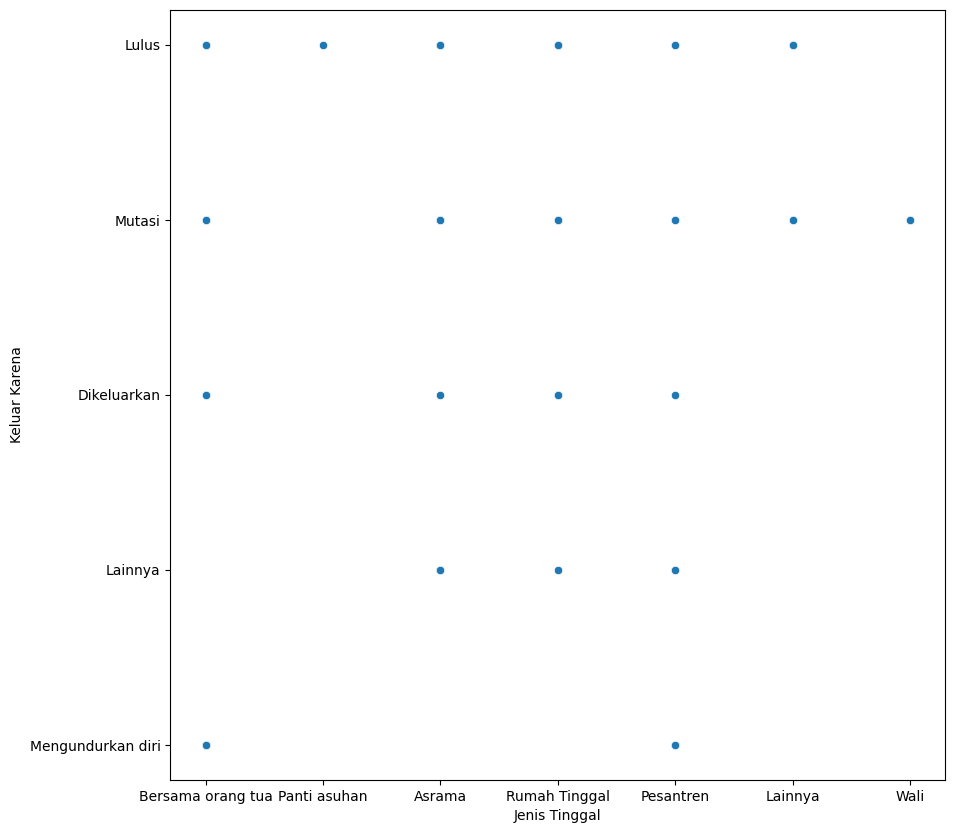

In [35]:
# visuaslisasi data Jenis Tinggal dan Keluar Karena
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Jenis Tinggal", y="Keluar Karena", data=data)
plt.show()

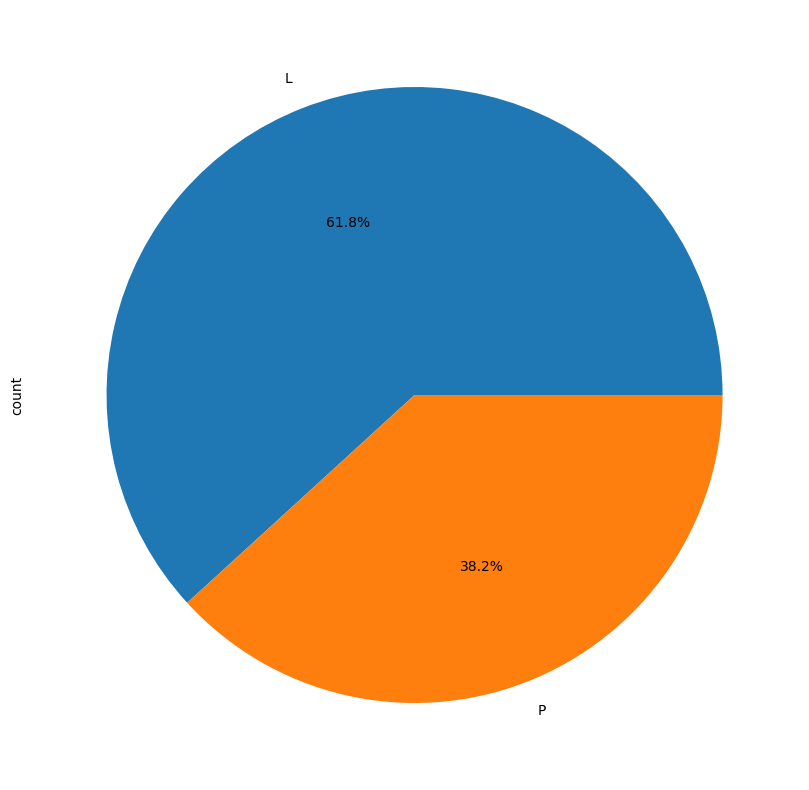

In [36]:
# visualisasi data smk askha dgn menggunakan pie chart
plt.figure(figsize=(10, 10))
data["JK"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


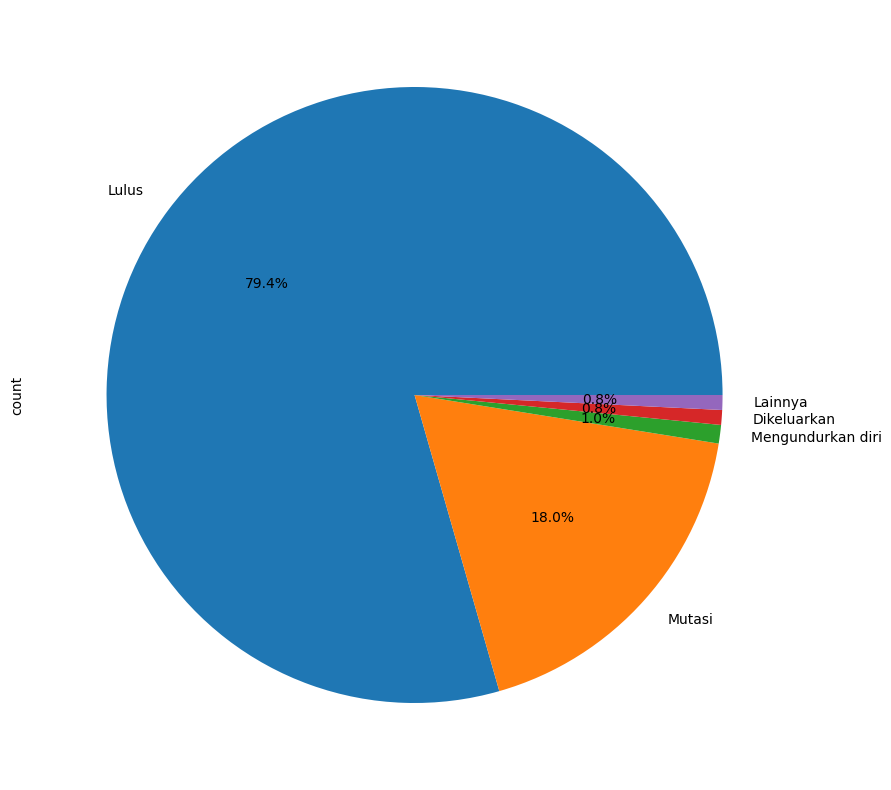

In [37]:
# visuaslisasi data jk dan keluar karena dgn menggunakan pie chart
plt.figure(figsize=(10, 10))
data["Keluar Karena"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
